## IMPORTING THE LIBRARIES

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from imblearn.combine import SMOTETomek
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## READING THE DATA

In [4]:
churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
churn_data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## UNIVATIATE ANALYSIS

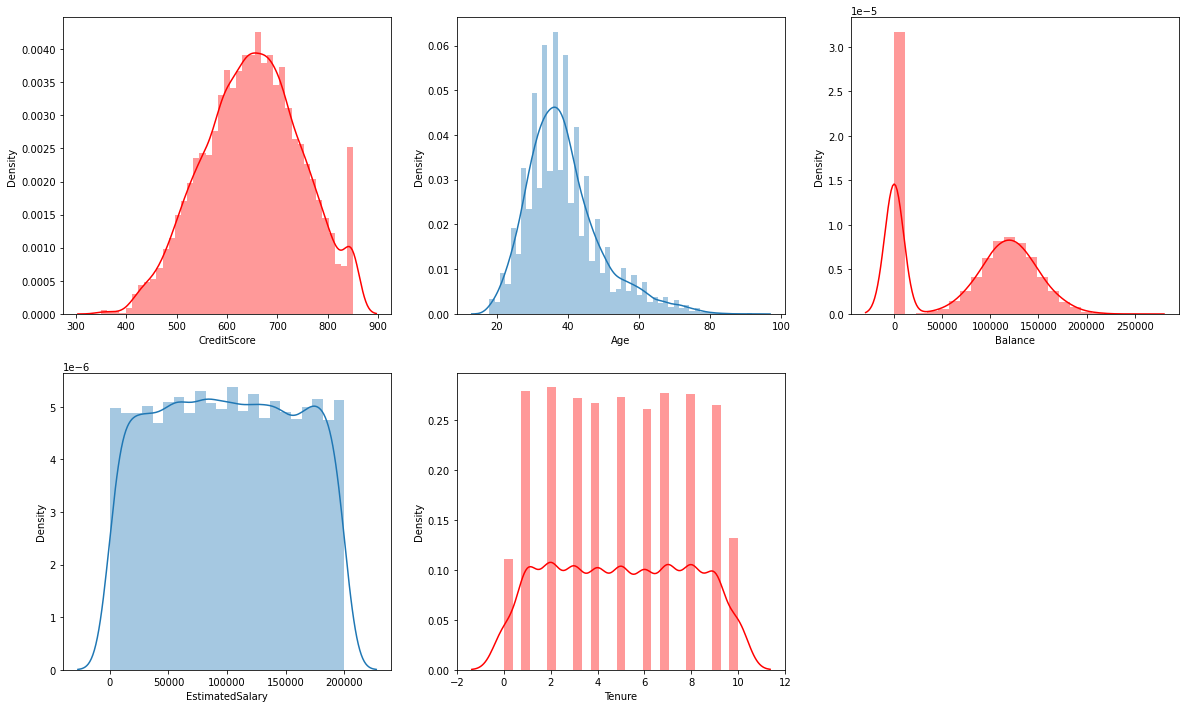

In [6]:
plt.figure(figsize=(20,12))
plt.subplot(231)
sns.distplot(churn_data['CreditScore'], color='r')
plt.subplot(232)
sns.distplot(churn_data['Age'])
plt.subplot(233)
sns.distplot(churn_data['Balance'], color='r')
plt.subplot(234)
sns.distplot(churn_data['EstimatedSalary'])
plt.subplot(235)
sns.distplot(churn_data['Tenure'], color='r')
plt.show()

## BIVARIATE AND MULTIVARIATE ANALYSIS

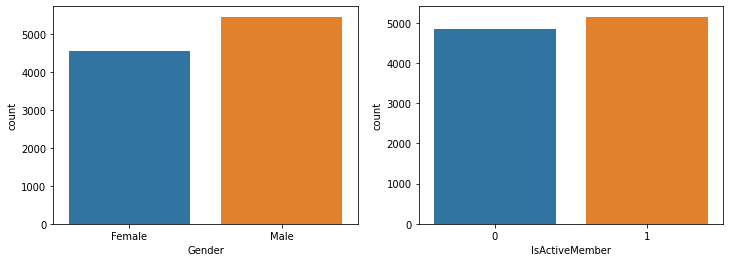

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(churn_data['Gender'])
plt.subplot(122)
sns.countplot(churn_data['IsActiveMember'])
plt.show()

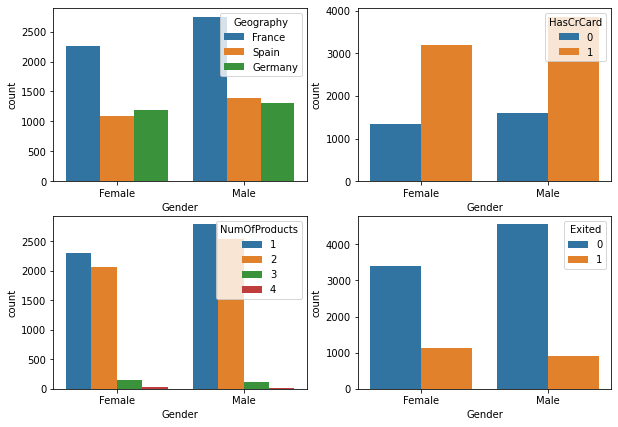

In [8]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(churn_data['Gender'], hue=churn_data['Geography'])
plt.subplot(222)
sns.countplot(churn_data['Gender'], hue = churn_data['HasCrCard'])
plt.subplot(223)
sns.countplot(churn_data['Gender'], hue = churn_data['NumOfProducts'])
plt.subplot(224)
sns.countplot(churn_data['Gender'], hue = churn_data['Exited'])
plt.show()

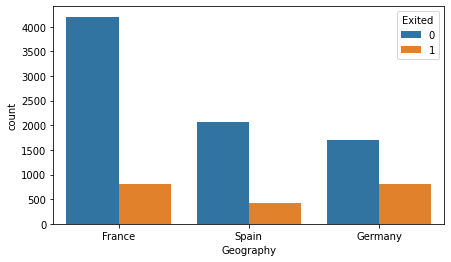

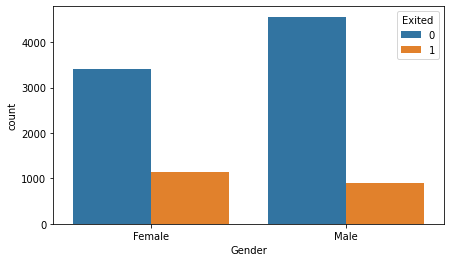

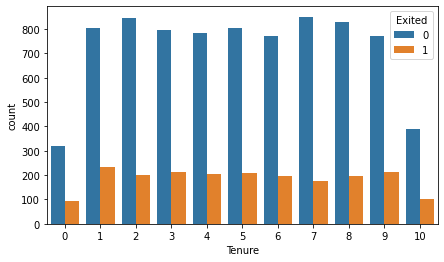

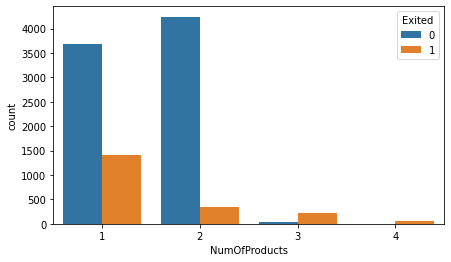

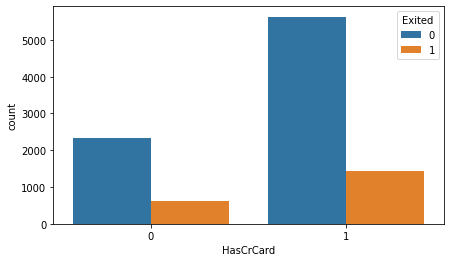

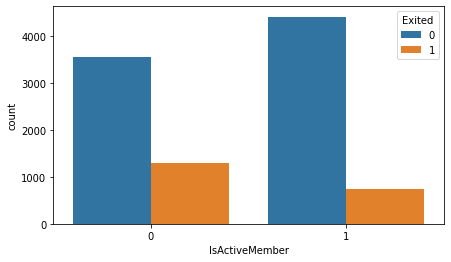

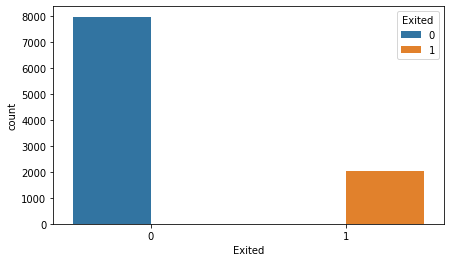

In [9]:
temp_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Balance', 'Age', 'EstimatedSalary'],axis=1)
cols = temp_data.columns
for c in cols:

  plt.figure(c,figsize=(7,4))
  sns.countplot(churn_data[c], hue= churn_data['Exited'])

plt.show()

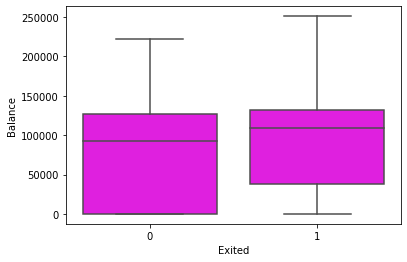

In [10]:
sns.boxplot(x=churn_data.Exited,y=churn_data.Balance,color="fuchsia")

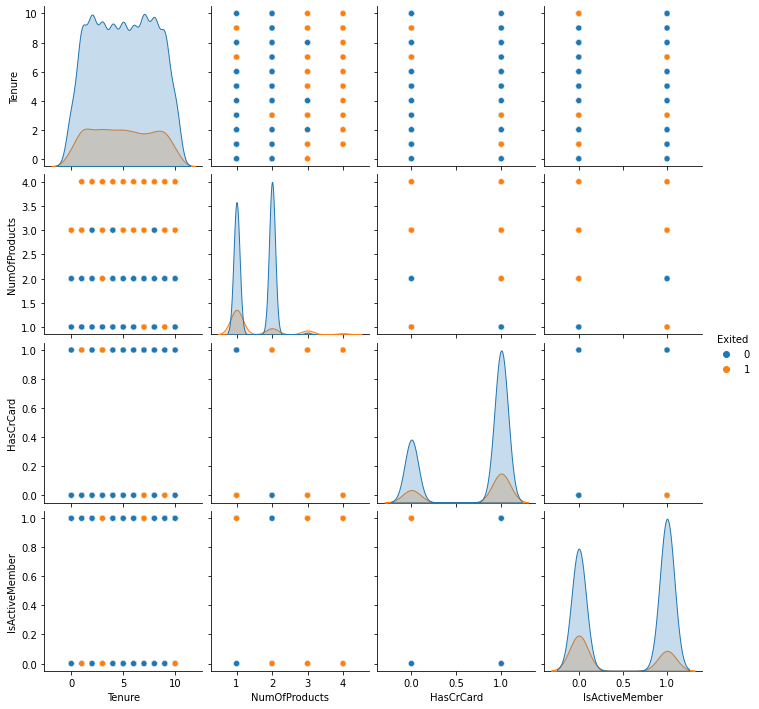

In [12]:
sns.pairplot(temp_data, hue='Exited')
plt.show()

## DESCRIPTIVE STATISTICS

In [13]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


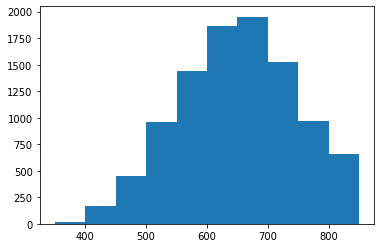

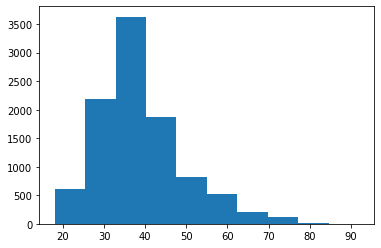

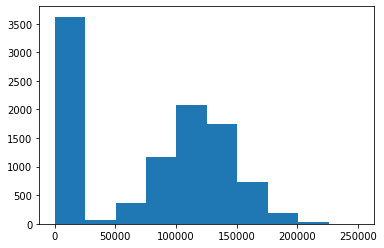

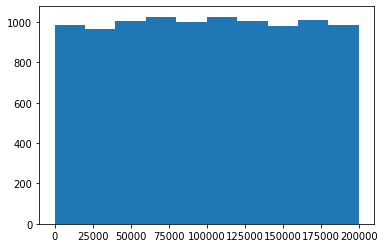

In [14]:
stat_data = churn_data[['CreditScore','Age','Balance','EstimatedSalary']]
for i in stat_data:
  plt.hist(churn_data[i])
  plt.show()

## HANDLING MISSING VALUES

In [15]:
churn_data.isna()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
null_data = churn_data.isna().sum()
null_data.sort_values()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## ENCODING OF CATEGORICAL COLUMNS

In [17]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
label_encoder = preprocessing.LabelEncoder()
label_encoding_columns = ['Gender', 'Surname', 'Geography']
for col in label_encoding_columns:
  churn_data[col]= label_encoder.fit_transform(churn_data[col])

churn_data  

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:
churn_data['Balance'] = churn_data['Balance'].astype('int64')
churn_data['EstimateSalary'] = churn_data['EstimatedSalary'].astype('int64')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimateSalary
0,1,15634602,1115,619,0,0,42,2,0,1,1,1,101348.88,1,101348
1,2,15647311,1177,608,2,0,41,1,83807,1,0,1,112542.58,0,112542
2,3,15619304,2040,502,0,0,42,8,159660,3,1,0,113931.57,1,113931
3,4,15701354,289,699,0,0,39,1,0,2,0,0,93826.63,0,93826
4,5,15737888,1822,850,2,0,43,2,125510,1,1,1,79084.10,0,79084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,1,39,5,0,2,1,0,96270.64,0,96270
9996,9997,15569892,1336,516,0,1,35,10,57369,1,1,1,101699.77,0,101699
9997,9998,15584532,1570,709,0,0,36,7,0,1,0,1,42085.58,1,42085
9998,9999,15682355,2345,772,1,1,42,3,75075,2,1,0,92888.52,1,92888


## SPLITTING DATA INTO DEPENDENT AND INDEPENDENT VARIABLES AND SCALING THE DATA

In [20]:
smk = SMOTETomek(0.90)

y = churn_data['Exited']
x = churn_data.drop(columns=['Exited'],axis=1)

x_bal, y_bal = smk.fit_resample(x,y)
print(y.value_counts())
print(y_bal.value_counts())

0    7963
1    2037
Name: Exited, dtype: int64
0    7472
1    6675
Name: Exited, dtype: int64


In [21]:
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)

## SPLIT DATA INTO TRAIN AND TEST SET

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.33, random_state=42)